# Homework Week 1 - Probability


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy.stats as st
plt.rcParams['figure.figsize'] = (6,4)
rng = np.random.default_rng(0)  # reproducibility

## Problem 1 – Uniform $X\sim\text{Unif}(0,1)$

In [2]:
# Part (A): Monte‑Carlo check
n = 1_000_000
x = rng.uniform(size=n)
prob_est = np.mean(x**2 <= 0.25)
print('P(X^2 ≤ 0.25)  MC≈', prob_est, '  analytic = 0.5')

# Parts (C) & (D): moments of Y = X^2
y = x**2
print('E[Y]  MC≈', y.mean(), '  analytic = 1/3')
print('Var[Y] MC≈', y.var(ddof=0), '  analytic = 4/45')

P(X^2 ≤ 0.25)  MC≈ 0.500194   analytic = 0.5
E[Y]  MC≈ 0.3335606157428188   analytic = 1/3
Var[Y] MC≈ 0.0890025517252101   analytic = 4/45


## Problem 3 – Chi‑squared moments

In [3]:
d_vals = [1, 2, 5, 10]
for d in d_vals:
    X = rng.chisquare(d, 200_000)
    print(f'd={d}:  mean≈{X.mean():.3f} (analytic {d}),  var≈{X.var(ddof=0):.3f} (analytic {2*d})')

d=1:  mean≈1.005 (analytic 1),  var≈2.014 (analytic 2)
d=2:  mean≈1.997 (analytic 2),  var≈3.968 (analytic 4)
d=5:  mean≈5.010 (analytic 5),  var≈10.096 (analytic 10)
d=10:  mean≈9.996 (analytic 10),  var≈19.945 (analytic 20)


## Problem 5 – Binomial proportion simulations

In [4]:
N_values = [5, 10, 25, 50, 100]
P = 0.5
MC_sds = []
theory_sds = []

for N in N_values:
    reps = 10000
    samples = rng.binomial(N, P, reps) / N
    MC_sds.append(samples.std(ddof=1))
    theory_sds.append(np.sqrt(P*(1-P)/N))
    print(f'N={N}: mean MC≈{samples.mean():.3f}, sd MC≈{MC_sds[-1]:.4f}, theory sd={theory_sds[-1]:.4f}')

N=5: mean MC≈0.502, sd MC≈0.2220, theory sd=0.2236
N=10: mean MC≈0.499, sd MC≈0.1602, theory sd=0.1581
N=25: mean MC≈0.500, sd MC≈0.0992, theory sd=0.1000
N=50: mean MC≈0.500, sd MC≈0.0706, theory sd=0.0707
N=100: mean MC≈0.500, sd MC≈0.0504, theory sd=0.0500


<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\crist\AppData\Local\Temp\ipykernel_30504\283918755.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('N'); plt.ylabel('Standard deviation of $\hat p_N$')


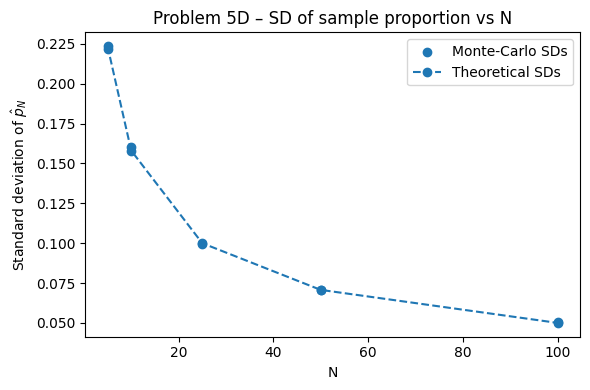

In [5]:
# Part (D): SD vs N plot, saved to PDF
plt.figure(figsize=(6,4))
plt.scatter(N_values, MC_sds, label='Monte‑Carlo SDs')
plt.plot(N_values, theory_sds, marker='o', linestyle='--', label='Theoretical SDs')
plt.xlabel('N'); plt.ylabel('Standard deviation of $\hat p_N$')
plt.legend()
plt.title('Problem 5D – SD of sample proportion vs N')
plt.tight_layout()
plt.savefig('prob5_sd_plot.pdf')
plt.show()